# importing libraries 

In [2]:
import numpy as np 
import pandas as pd

# loading dataset

In [9]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [11]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [15]:
df.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'],inplace = True)

In [17]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,Penicillin,Abnormal


In [19]:
df.duplicated().sum()

534

In [21]:
df.drop_duplicates(inplace = True)

In [23]:
df.describe()

,Age,Billing Amount
count,54966.000000,54966.000000
mean,51.535185,25544.306284
std,19.605661,14208.409711
min,13.000000,-2008.492140
25%,35.000000,13243.718641
50%,52.000000,25542.749145
75%,68.000000,37819.858159
max,89.000000,52764.276736


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Gender'>

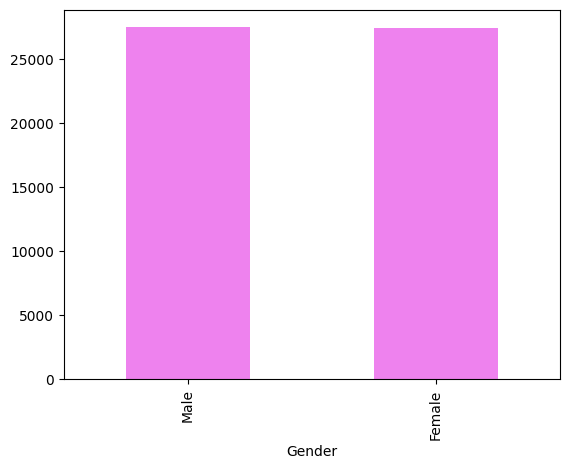

In [29]:
df['Gender'].value_counts().plot(kind = 'bar',color='violet')

<Axes: xlabel='Blood Type'>

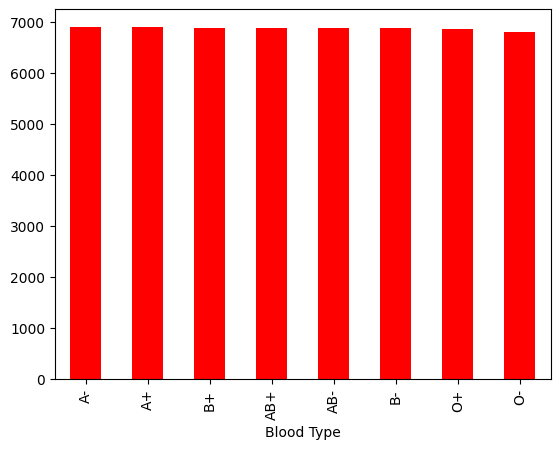

In [31]:
df['Blood Type'].value_counts().plot(kind = 'bar',color='red')

<Axes: xlabel='Medical Condition'>

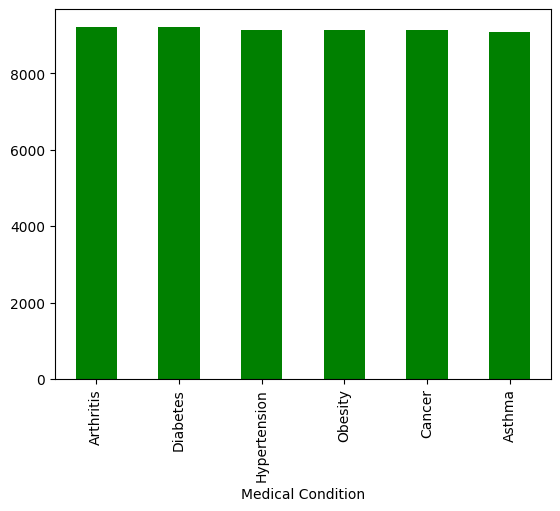

In [33]:
df['Medical Condition'].value_counts().plot(kind = 'bar',color='green')

In [35]:
df['Hospital'].value_counts()

Hospital
LLC Smith                       44
Ltd Smith                       39
Johnson PLC                     37
Smith Ltd                       37
Smith Group                     36
                                ..
PLC Navarro                      1
PLC Mcintosh                     1
and Hernandez, Hughes Walton     1
Myers-Williams                   1
Moreno Murphy, Griffith and      1
Name: count, Length: 39876, dtype: int64

<Axes: xlabel='Insurance Provider'>

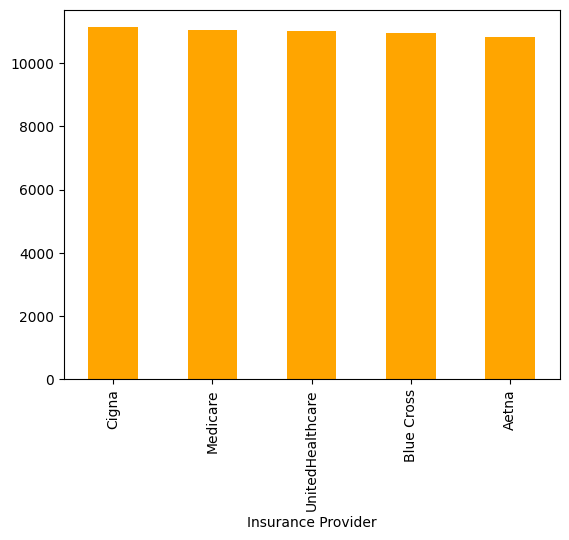

In [37]:
df['Insurance Provider'].value_counts().plot(kind = 'bar',color='orange')	

<Axes: xlabel='Admission Type'>

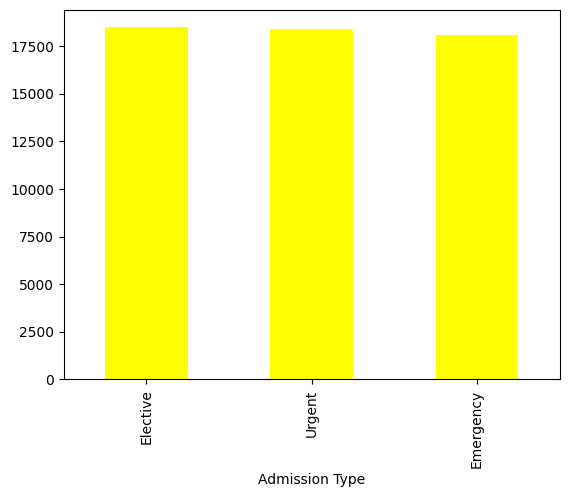

In [39]:
df['Admission Type'].value_counts().plot(kind = 'bar',color='yellow')

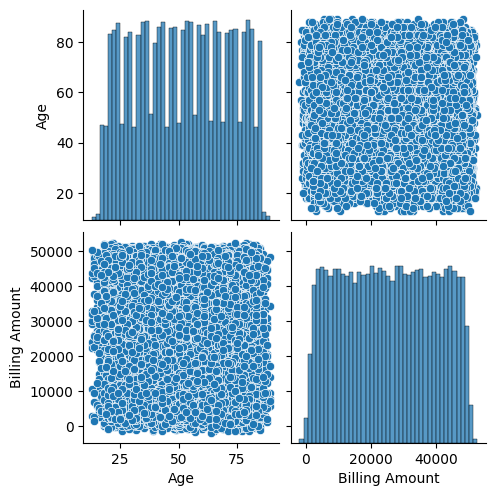

In [41]:
sns.pairplot(df)

<Axes: ylabel='Age'>

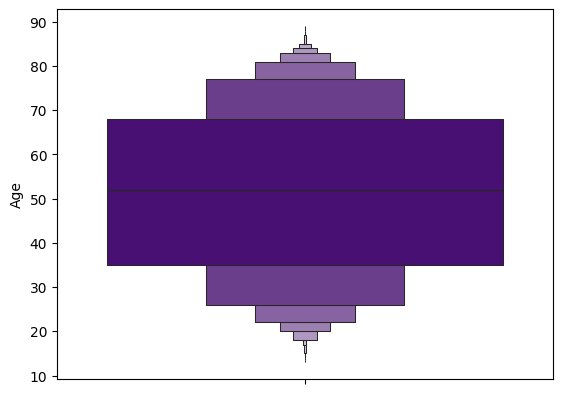

In [59]:
sns.boxenplot(df['Age'],color='indigo')

<Axes: ylabel='Billing Amount'>

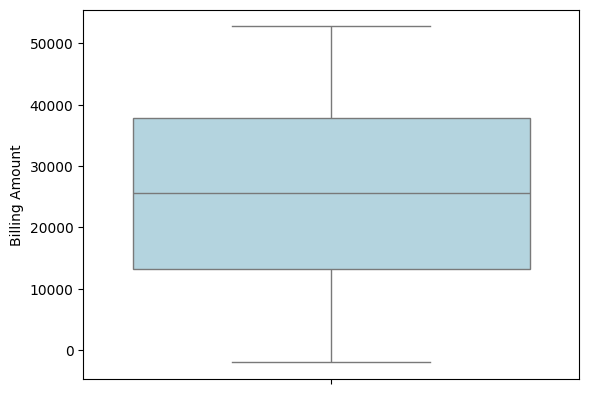

In [63]:
sns.boxplot(df['Billing Amount'],color='lightblue')

# splitting the data

In [48]:
x  = df.drop(columns = ['Test Results'])
y  = df['Test Results']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [52]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
# Preprocessing
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 
                       'Insurance Provider', 'Admission Type', 'Medication']
numerical_columns = ['Billing Amount']


# Transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Pipeline for DecisionTreeClassifier
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])
# Fit and predict
dt_pipeline.fit(x_train, y_train)
dt_predictions = dt_pipeline.predict(x_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.4264144078588321
